# EDA for Two Sigma

### Required imports

In [48]:
# Pandas and Numpy for data structures and util fucntions
import re
import itertools
import numpy as np
import pandas as pd
from numpy.random import rand
from datetime import datetime
pd.options.display.max_colwidth = 600

# Statsmodels functions
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.seasonal import seasonal_decompose

# Scikit Imports
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Matplot Imports
import matplotlib.pyplot as plt
#plt.xkcd()

# params = {'legend.fontsize': 'x-large',
#           'figure.figsize': (30, 15),
#          'axes.labelsize': 'x-large',
#          'axes.titlesize':'x-large',
#          'xtick.labelsize':'x-large',
#          'ytick.labelsize':'x-large'}
# plt.rcParams.update(params)

plt.rcParams['figure.figsize'] = (30,25)

%matplotlib inline

# pandas display data frames as tables
from IPython.display import display, HTML

### Load Data and Describe

In [2]:
train_df = pd.read_json(r'data\train.json')

In [3]:
train_df.dtypes

bathrooms          float64
bedrooms             int64
building_id         object
created             object
description         object
display_address     object
features            object
interest_level      object
latitude           float64
listing_id           int64
longitude          float64
manager_id          object
photos              object
price                int64
street_address      object
dtype: object

In [4]:
train_df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [33]:
train_df.head(2)

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address,counter,image_cnt
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy These Following Apartment Features As You Rent Here? Modern Designed Bathroom w/ a Deep Spa Soaking Tub? Room to Room AC/Heat? Real Oak Hardwood Floors? Rain Forest Shower Head? SS steel Appliances w/ Chef Gas Cook Oven & LG Fridge? washer /dryer in the apt? Cable Internet Ready? Granite Counter Top Kitchen w/ lot of cabinet storage spaceIt's Just A Few blocks To L Train<br /><br />Don't miss out!<br /><br />We have several great apartments in the immediate area.<br /><br />For additional information 687-878-2229<p><a website_redacted,Metropolitan Avenue,[],1,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,"[https://photos.renthop.com/2/7211212_1ed4542ec81621d70d1061aa833e669c.jpg, https://photos.renthop.com/2/7211212_7dfc41dced69245065df83d08eed4a00.jpg, https://photos.renthop.com/2/7211212_c17853c4b869af6f53af08b0f5820b4c.jpg, https://photos.renthop.com/2/7211212_787ad8ea0c089792e7453e2121f8ac89.jpg, https://photos.renthop.com/2/7211212_2e88b0d293ee333c804c2f00536eee49.jpg]",3000,792 Metropolitan Avenue,1,5
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allowed, Dogs Allowed]",0,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,"[https://photos.renthop.com/2/7150865_be3306c5d89c6bfa755c6e89c9ed64d5.jpg, https://photos.renthop.com/2/7150865_655f861a1d5da70050010611016ae2ad.jpg, https://photos.renthop.com/2/7150865_5b8cc459f3abd38bc81cbf329dab3220.jpg, https://photos.renthop.com/2/7150865_2f59c34ca4ea98c26d559109a467ef84.jpg, https://photos.renthop.com/2/7150865_2258d2eb5b5fb4bc0eb6534929cdee15.jpg, https://photos.renthop.com/2/7150865_af28a5075bd321e694791645423dcdde.jpg, https://photos.renthop.com/2/7150865_714a3d63488162ebe4a22896dd5138f7.jpg, https://photos.renthop.com/2/7150865_8dda0ecbe4c6015d3e8dffe16808aa0b....",5465,808 Columbus Avenue,1,11


In [6]:
train_df.created = pd.to_datetime(train_df.created)

In [7]:
train_df['interest_level'] = train_df['interest_level'].apply(lambda x: 0 if x=="low" else 1 if x =="medium" else 2)
train_df['counter'] = 1

In [32]:
train_df['image_cnt'] = train_df['photos'].apply(lambda x: len(x))

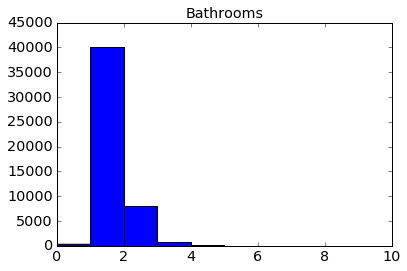

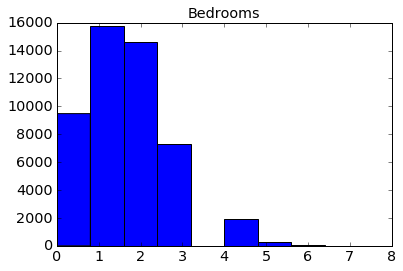

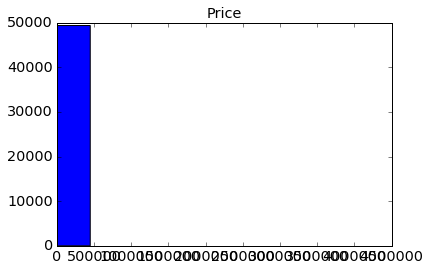

In [8]:
plt.hist(train_df.bathrooms)
plt.title("Bathrooms")
plt.show()

plt.hist(train_df.bedrooms)
plt.title("Bedrooms")
plt.show()

plt.hist(train_df.price)
plt.title("Price")
plt.show()

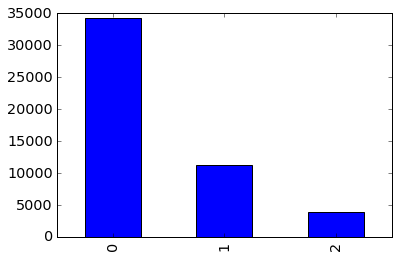

In [9]:
train_df.interest_level.value_counts().plot(kind='bar')

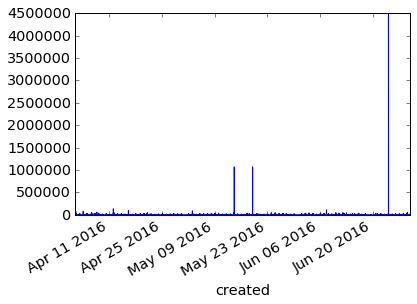

In [10]:
fig, ax = plt.subplots()
fig.autofmt_xdate()
train_df.groupby('created').mean()['price'].plot()

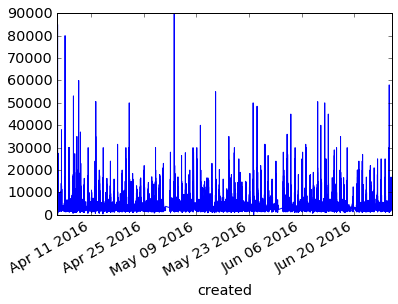

In [23]:
fig, ax = plt.subplots()
fig.autofmt_xdate()
subset_df = train_df.groupby('created').mean()
subset_df[subset_df.price<100000]['price'].plot()

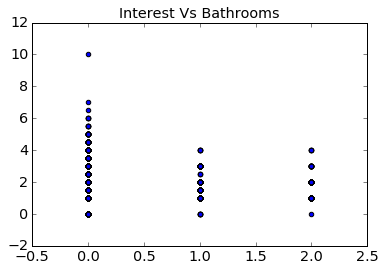

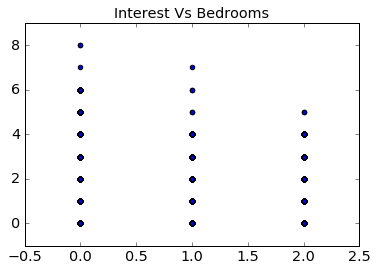

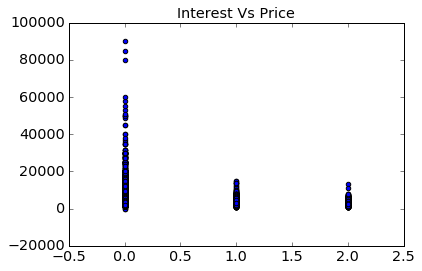

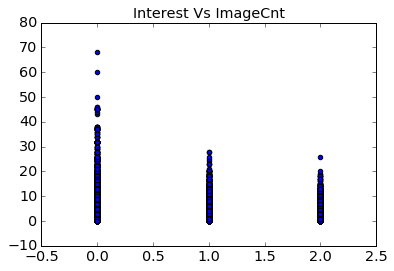

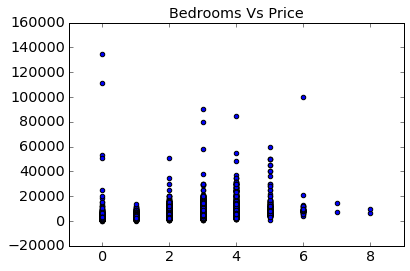

In [37]:
plt.scatter(train_df.interest_level,train_df.bathrooms)
plt.title("Interest Vs Bathrooms")
plt.show()

plt.scatter(train_df.interest_level,train_df.bedrooms)
plt.title("Interest Vs Bedrooms")
plt.show()


plt.scatter(train_df[train_df.price<100000].interest_level,train_df[train_df.price<100000].price)
plt.title("Interest Vs Price")
plt.show()


plt.scatter(train_df[train_df.price<100000].interest_level,train_df[train_df.price<100000].image_cnt)
plt.title("Interest Vs ImageCnt")
plt.show()


plt.scatter(train_df[train_df.price<300000].bedrooms,train_df[train_df.price<300000].price)
plt.title("Bedrooms Vs Price")
plt.show()

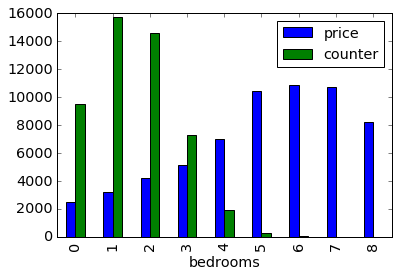

In [53]:
train_df.groupby('bedrooms').agg({'price' : np.mean,'counter':np.sum}).plot(kind='bar')